In [1]:
import pandas as pd
import numpy as np
from itertools import product
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config = {
    "model_saves":"model_saves",
    "artifacts_dir":"artifacts",
}

In [19]:
def get_base_clf_results(config):
    ALL_FEAT = ["AAC","DPC","CTD",
                "PAAC","APAAC","RSacid",
                "RSpolar","RSsecond","RScharge",
                "RSDHP","Combine","DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge"]
    model_dir = config["model_saves"]
    model_set = list(set([x.split("_")[0] for x in os.listdir(model_dir)]))
    
    metrics = {"model":[],"feature":[]}
    for m,f in product(model_set,ALL_FEAT):
        if not os.path.exists(os.path.join(model_dir,f"{m}_{f}","metrics.json")):
            continue
        
        with open(os.path.join(model_dir,f"{m}_{f}","metrics.json"),"r") as f0:
            data = json.load(f0)
            
        for k in data.keys():
            try:
                metrics[k].append(data[k])
            except KeyError:
                metrics[k] = [data[k]]
        
        metrics["model"].append(m)
        metrics["feature"].append(f)
                    
    metric_df = pd.DataFrame.from_dict(metrics,orient="columns")
    
    return metric_df
    

In [20]:
metrics = get_base_clf_results(config)
metrics

,model,feature,accuracy,precision,recall,f1,sensitivity,specificity
0,XGBClassifier,AAC,0.802124,0.801948,0.801589,0.801733,0.787408,0.815770
1,XGBClassifier,DPC,0.720299,0.720631,0.720896,0.720263,0.736713,0.705080
2,XGBClassifier,CTD,0.785995,0.787249,0.787177,0.785995,0.818479,0.755876
3,XGBClassifier,PAAC,0.780488,0.780295,0.780650,0.780349,0.784955,0.776346
4,XGBClassifier,APAAC,0.773407,0.774511,0.774511,0.773407,0.803761,0.745262
...,...,...,...,...,...,...,...,...
79,SVC,RSsecond,0.897718,0.897885,0.897245,0.897497,0.884710,0.909780
80,SVC,RScharge,0.895751,0.896208,0.895082,0.895474,0.877351,0.912813
81,SVC,RSDHP,0.895358,0.896066,0.894554,0.895040,0.873262,0.915845
82,SVC,Combine,0.903619,0.904467,0.902782,0.903313,0.880621,0.924943


In [21]:
metrics.to_csv(os.path.join(config["artifacts_dir"],"base_clf_results.csv"),index=False)

In [22]:
metrics = metrics.set_index(["model","feature"])
metrics

accuracy  precision   
model         feature                                                           
XGBClassifier AAC                                         0.802124   0.801948  \
              DPC                                         0.720299   0.720631   
              CTD                                         0.785995   0.787249   
              PAAC                                        0.780488   0.780295   
              APAAC                                       0.773407   0.774511   
...                                                            ...        ...   
SVC           RSsecond                                    0.897718   0.897885   
              RScharge                                    0.895751   0.896208   
              RSDHP                                       0.895358   0.896066   
              Combine                                     0.903619   0.904467   
              DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge  0.904799   0.905268   

                                                            recall        f1   
model         feature                                                          
XGBClassifier AAC                                         0.801589  0.801733  \
              DPC                                         0.720896  0.720263   
              CTD                                         0.787177  0.785995   
              PAAC                                        0.780650  0.780349   
              APAAC                                       0.774511  0.773407   
...                                                            ...       ...   
SVC           RSsecond                                    0.897245  0.897497   
              RScharge                                    0.895082  0.895474   
              RSDHP                                       0.894554  0.895040   
              Combine                                     0.902782  0.903313   
              DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge  0.904158  0.904550   

                                                          sensitivity   
model         feature                                                   
XGBClassifier AAC                                            0.787408  \
              DPC                                            0.736713   
              CTD                                            0.818479   
              PAAC                                           0.784955   
              APAAC                                          0.803761   
...                                                               ...   
SVC           RSsecond                                       0.884710   
              RScharge                                       0.877351   
              RSDHP                                          0.873262   
              Combine                                        0.880621   
              DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge     0.887163   

                                                          specificity  
model         feature                                                  
XGBClassifier AAC                                            0.815770  
              DPC                                            0.705080  
              CTD                                            0.755876  
              PAAC                                           0.776346  
              APAAC                                          0.745262  
...                                                               ...  
SVC           RSsecond                                       0.909780  
              RScharge                                       0.912813  
              RSDHP                                          0.915845  
              Combine                                        0.924943  
              DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge     0.921152  

[84 rows x 6 columns]

In [23]:
metrics["accuracy"].unstack()

feature,AAC,APAAC,CTD,Combine,DPC,DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge,PAAC,RSDHP,RSacid,RScharge,RSpolar,RSsecond
model,,,,,,,,,,,,
ExtraTreesClassifier,0.887884,0.869001,0.824154,0.880016,0.851692,0.894571,0.873721,0.888670,0.887884,0.882376,0.887097,0.881983
KNN,0.810779,0.805665,0.760425,0.810386,0.765932,0.812352,0.826121,0.810779,0.805665,0.806845,0.809992,0.807238
LGBMClassifier,0.883163,0.879622,0.861920,0.902832,0.874902,0.901652,0.884736,0.887490,0.889457,0.888670,0.881589,0.883556
LinearRegression,0.845791,0.850905,0.845791,0.819434,0.840677,0.845004,0.847364,0.870181,0.868607,0.870181,0.871361,0.859953
RF,0.881983,0.873328,0.824548,0.880803,0.850511,0.891424,0.878836,0.885917,0.880409,0.885917,0.880016,0.882376
SVC,0.893391,0.883950,0.856019,0.903619,0.896932,0.904799,0.885523,0.895358,0.897325,0.895751,0.897718,0.897718
XGBClassifier,0.802124,0.773407,0.785995,0.835956,0.720299,0.803304,0.780488,0.785208,0.787569,0.799764,0.782455,0.797010


<Axes: xlabel='feature', ylabel='model'>

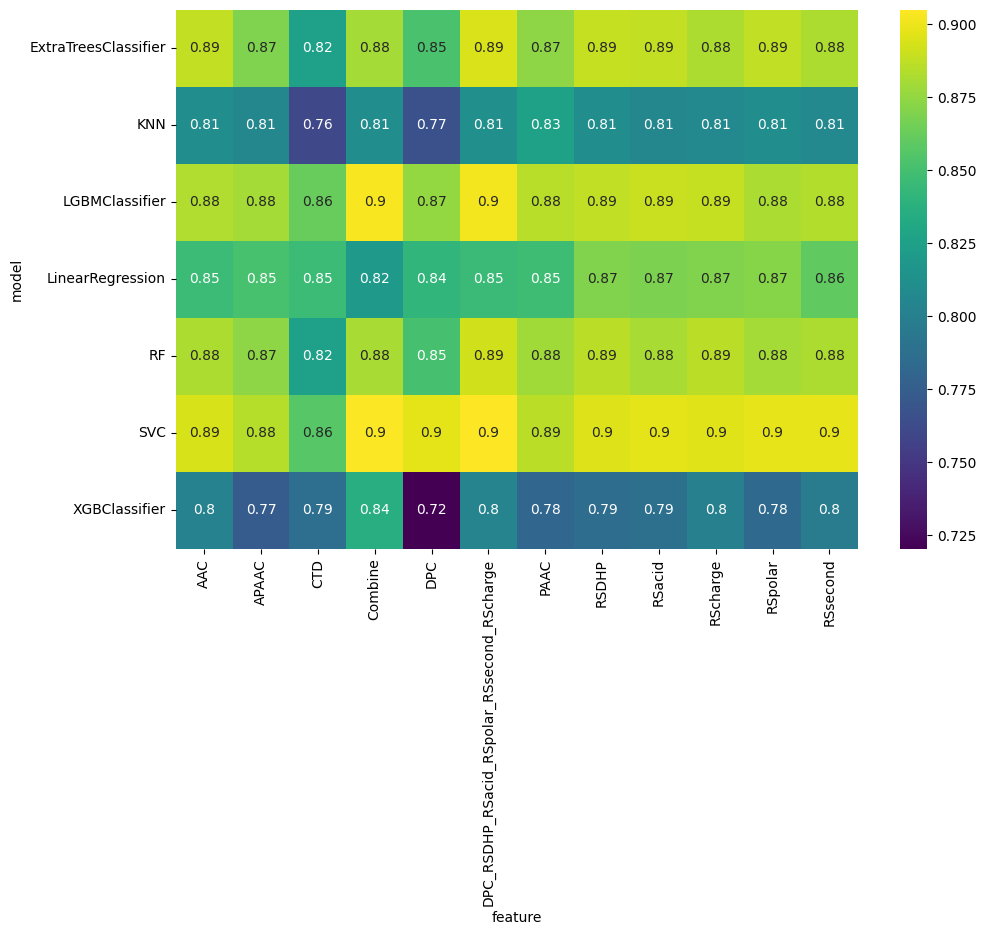

In [24]:
fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(metrics["accuracy"].unstack(), annot=True,cmap=sns.color_palette("viridis", as_cmap=True),ax=ax)

In [25]:
metrics["f1"].unstack()

feature,AAC,APAAC,CTD,Combine,DPC,DPC_RSDHP_RSacid_RSpolar_RSsecond_RScharge,PAAC,RSDHP,RSacid,RScharge,RSpolar,RSsecond
model,,,,,,,,,,,,
ExtraTreesClassifier,0.887685,0.868777,0.823794,0.879770,0.851548,0.894359,0.873522,0.888434,0.887699,0.882118,0.886758,0.881777
KNN,0.810127,0.802167,0.760402,0.810384,0.764631,0.812348,0.823250,0.810468,0.804930,0.806214,0.809956,0.806764
LGBMClassifier,0.882955,0.879421,0.861552,0.902574,0.874641,0.901410,0.884532,0.887255,0.889222,0.888409,0.881355,0.883338
LinearRegression,0.845783,0.848580,0.845749,0.819416,0.840672,0.845004,0.845674,0.870171,0.868591,0.870177,0.871347,0.859952
RF,0.881489,0.873082,0.824059,0.880358,0.850221,0.891024,0.878591,0.885404,0.879945,0.885428,0.879520,0.881829
SVC,0.893157,0.883447,0.855777,0.903313,0.896670,0.904550,0.885015,0.895040,0.897017,0.895474,0.897380,0.897497
XGBClassifier,0.801733,0.773407,0.785995,0.835764,0.720263,0.802561,0.780349,0.785119,0.787417,0.799677,0.782443,0.797009


<Axes: xlabel='feature', ylabel='model'>

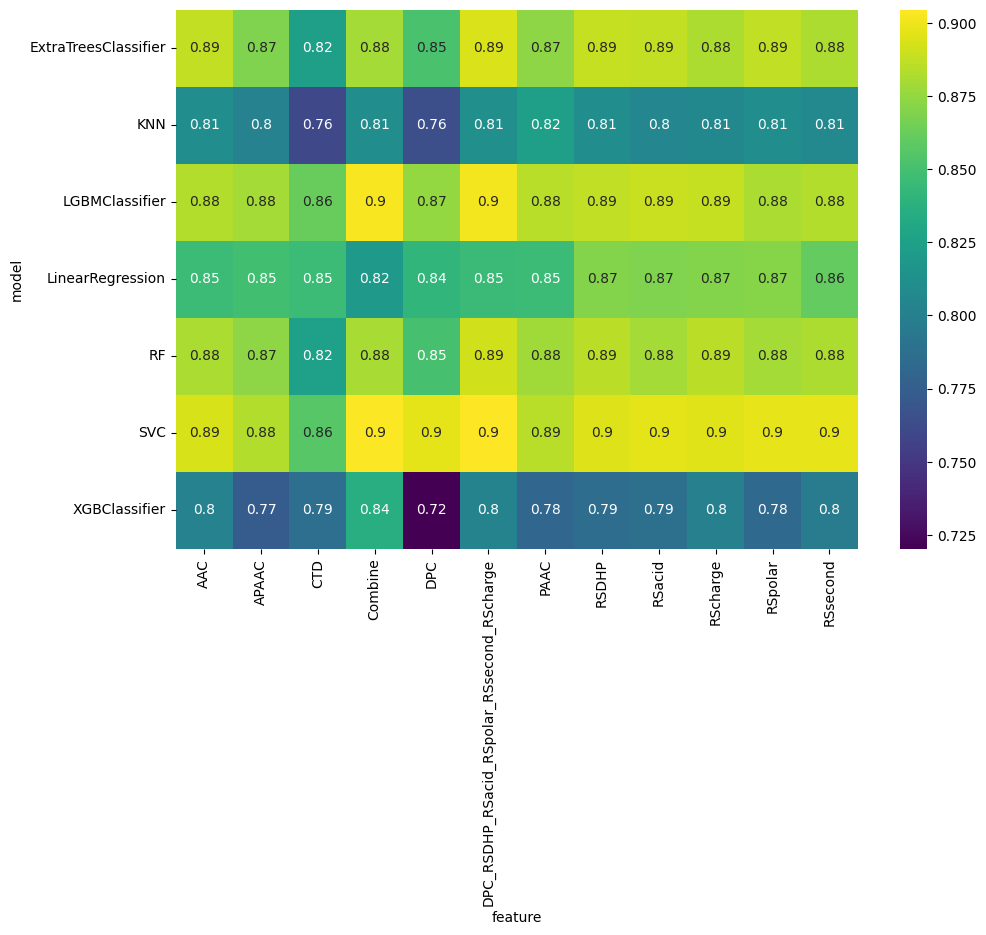

In [26]:
fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(metrics["f1"].unstack(), annot=True,cmap=sns.color_palette("viridis", as_cmap=True),ax=ax)